<a id="content1"></a>
## 1) Importing the Modules and Loading the Dataset

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_error

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

In [483]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

<a id="content2"></a>
## 2) Exploratory Data Analysis (EDA)

## 2.1 ) The Features and the 'Target' variable

In [484]:
df=train.copy()
df.shape

(1460, 81)

In [485]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

## 2.2 ) Check for Missing Values

In [486]:
for i in df.columns:
 if(df[i].isnull().sum() > 0):
   print(i, df[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


## 2.3 ) Separate Dataframes (depending on data type)

#### CATEGORICAL FEATURES

In [487]:
cat_df=df.select_dtypes(include='object')

In [488]:
cat_df.shape

(1460, 43)

#### NUMERIC FEATURES

In [489]:
num_df=df.select_dtypes(include='number')
num_df.shape

(1460, 37)

#### MERGING THE TRAIN & TEST SETS

In [490]:
dat=pd.concat([train,test])

In [491]:
print(dat.shape)
dat = dat.reset_index(drop=True)

(2919, 81)


In [492]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [493]:
dat.drop(['SalePrice'],axis=1,inplace=True)

## 2.4 ) Analyzing the Target i.e. 'SalePrice'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice')

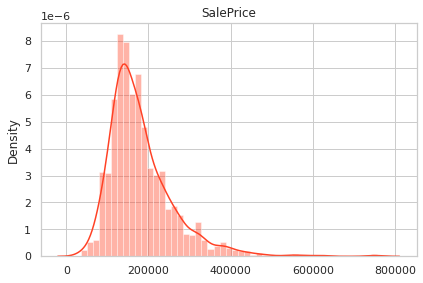

In [494]:
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('SalePrice')

#### **The distribution of target is right skewed. Hence taking log transform.**

####  TAKING 'Log Transform' OF THE TARGET

In [495]:
df['SalePrice']=np.log1p(df['SalePrice']) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'log(1+SalePrice)')

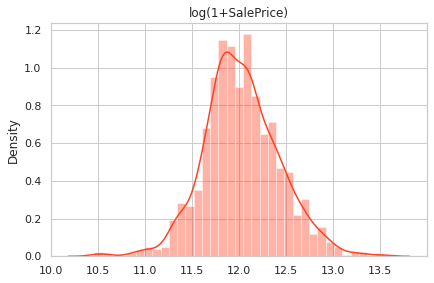

In [496]:
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')  # better.

## 2.5 ) Most Related Features to the Target

In [497]:
cor= df[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)

In [498]:
cor.SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

#### INFERENCES--
Features Having Correlation > 0.5 are significantly important than others although there are some features which does not come under these observations like YearBuilt, Area etc...


Checking the Correlation map of Features Having Correlation > 0.5

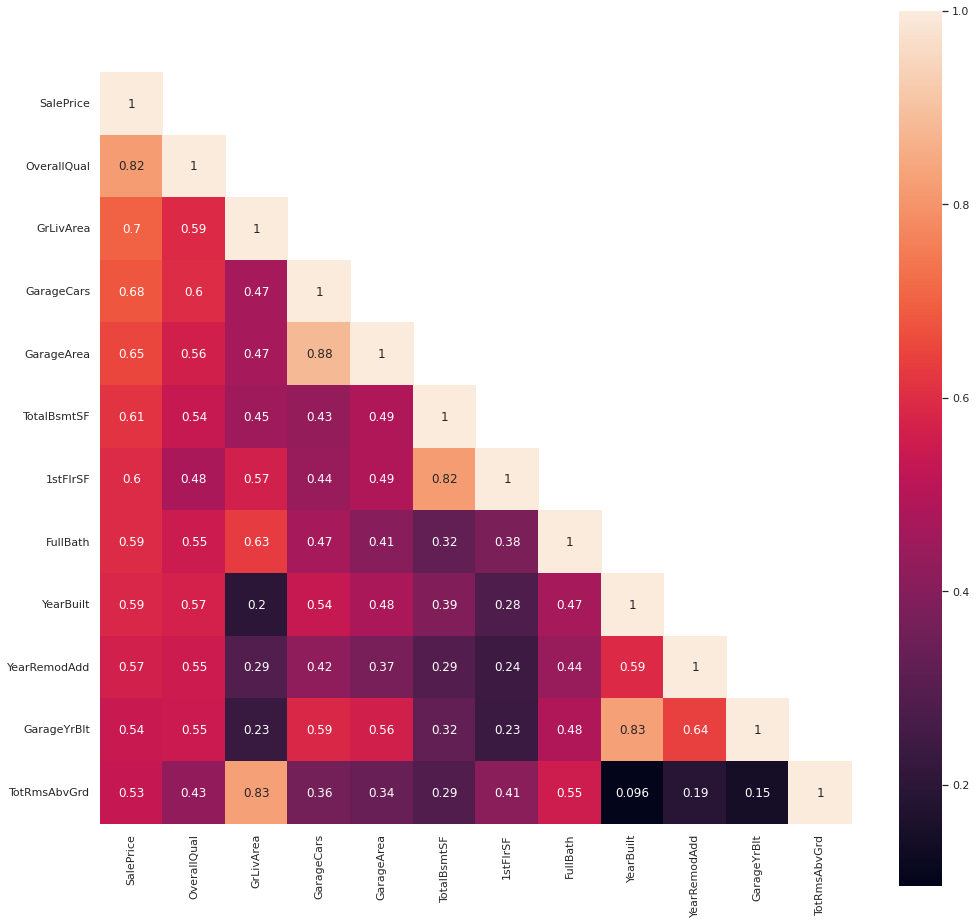

In [499]:
cor_mat= df[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

## 2.6 ) Univariate Analysis

In this section the univariate analysis is performed for the numeric Features and categorical features that has correlation of more than 0.5 with SalePrice.


#### NUMERIC FEATURES (GrlivArea,GarageArea,TotalBsmtSF,1stFlrSF)

In [500]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


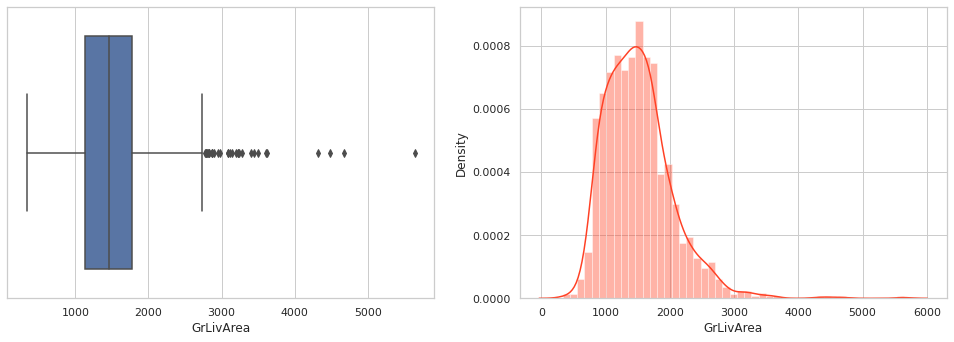

In [501]:
plot_num('GrLivArea')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


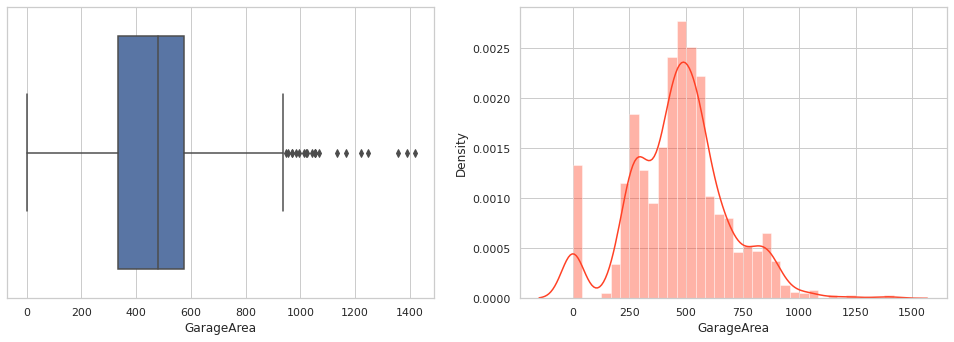

In [502]:
plot_num('GarageArea')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


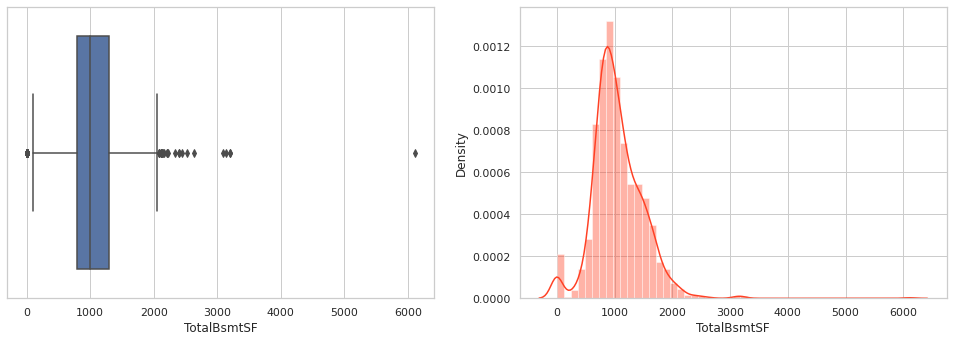

In [503]:
plot_num('TotalBsmtSF') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


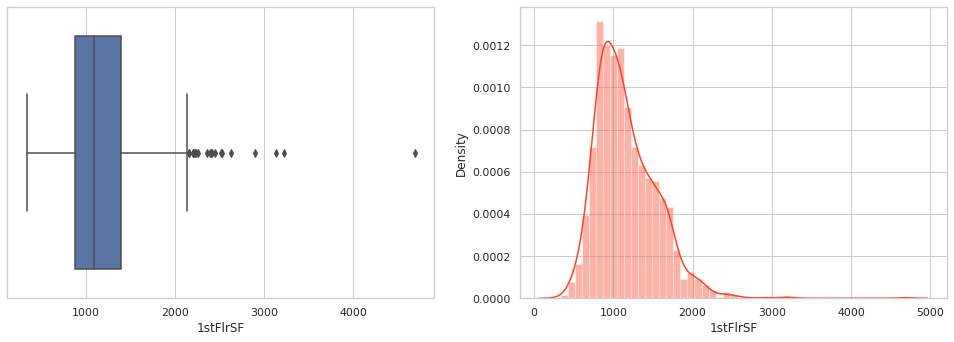

In [504]:
plot_num('1stFlrSF')

#### All the features are right skewed. We can therefore take 'log transform' of the features after the treatment of Missing Values 

#### CATEGORICAL FEATURES

In [505]:
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)

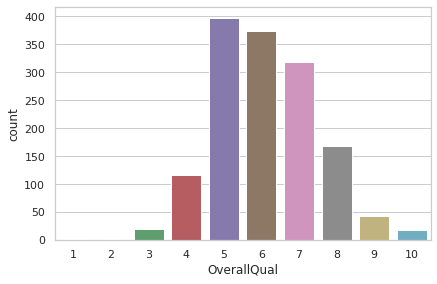

In [506]:
plot_cat('OverallQual')

Most of the houses has quality greater than 5 so most of the houses are generally above average in quality

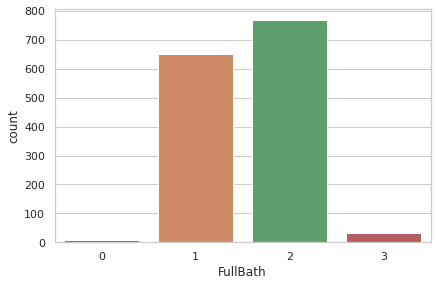

In [507]:
plot_cat('FullBath')

Most of the houses have more than 1 Full Bath


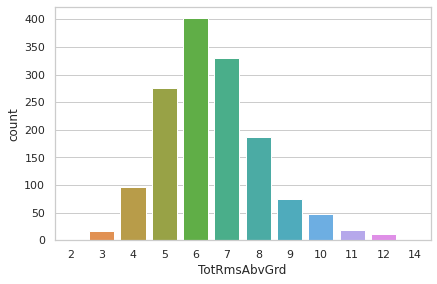

In [508]:
plot_cat('TotRmsAbvGrd')

Most of the Houses have more than 5 Rooms above ground Floor

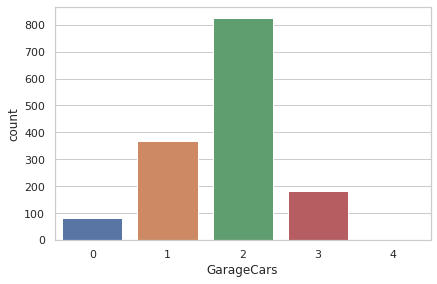

In [509]:
plot_cat('GarageCars')

## 2.7 ) Bivariate Analysis

In this section the Bivariate Analysis have been done.Most of the Outliers are treated in this section itself

#### NUMERIC FEATURES

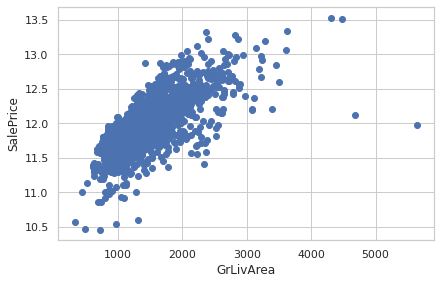

In [510]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

Removing the two Outliers lying on the right middle

In [511]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<13)].index)

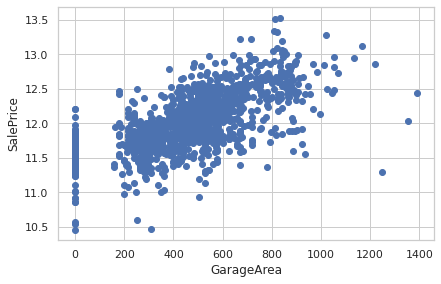

In [512]:
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

Removing Outliers that is GarageArea>1200

In [513]:
df = df.drop(df[(df['GarageArea']>1200)].index)

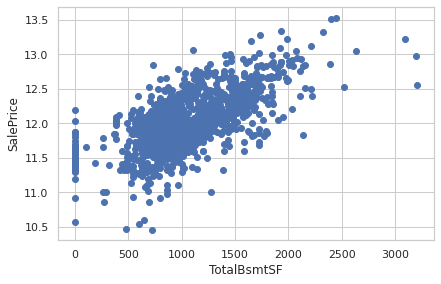

In [514]:
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()  

Removing Outliers that is TotalBsmtSF>3000

In [515]:
df = df.drop(df[(df['GarageArea']>3000)].index)

#### CATEGORICAL FEATURES

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


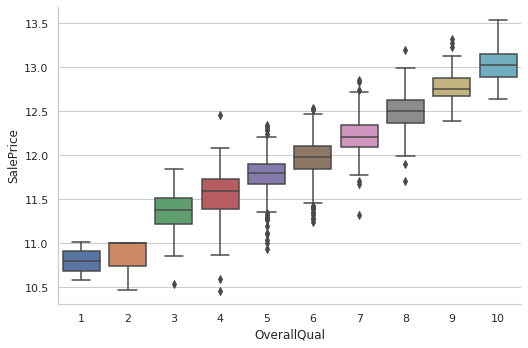

In [516]:
sns.factorplot(data=df,x='OverallQual',y='SalePrice',kind='box',size=5,aspect=1.5)

The SalePrice increases with the overall quality.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


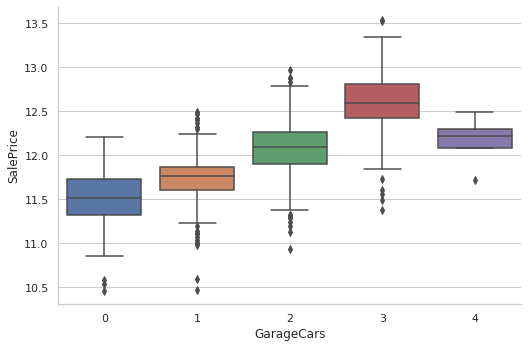

In [517]:
sns.factorplot(data=df,x='GarageCars',y='SalePrice',kind='box',size=5,aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


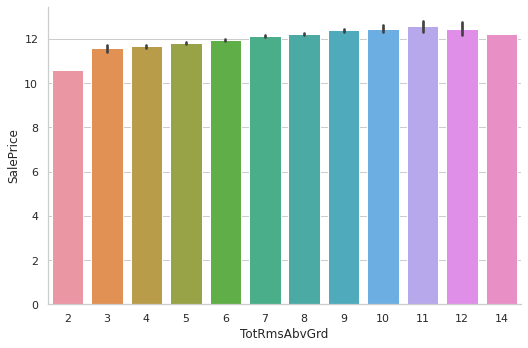

In [518]:
sns.factorplot(data=df,x='TotRmsAbvGrd',y='SalePrice',kind='bar',size=5,aspect=1.5)

<a id="content3"></a>
## 3 ) Missing Values Treatment

In [519]:
nan_all_data = (dat.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
Id              1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Dropping the top 5 Features because most of the data are missing from them and it makes no sense to add that into our prediction model.

In [520]:
dat.drop(['PoolQC','MiscFeature','Alley','Fence','Id','FireplaceQu'],axis=1,inplace=True)
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [521]:
cr=df.corr()
print("The corelation of the LotFrontage with Saleprice : " , cr.loc['LotFrontage','SalePrice'])

The corelation of the LotFrontage with Saleprice :  0.3745234289345955


In [522]:
dat['LotFrontage'].fillna(np.mean(dat['LotFrontage']),inplace=True)

Features like Garagequal,Garagecond,Garagefinish are important therefore we will create a new category for the missing values if its categorical or else fill 0.

Garage Properties:

In [523]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
  dat[col].fillna(0,inplace=True)

for col in ('GarageQual','GarageFinish','GarageCond','GarageType'):
  dat[col].fillna('None',inplace=True) 

BasementProperties:


In [524]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  dat[col].fillna(0,inplace=True)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  dat[col].fillna('None',inplace=True)



In [525]:
dat['MasVnrArea'].fillna(0,inplace=True)
dat['MasVnrType'].fillna('None',inplace=True)

Here nan does not mean no so I will with the most common one ie the mode.

In [526]:
dat['MSZoning'].fillna(dat['MSZoning'].mode()[0],inplace=True)

In [527]:
train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [528]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

Test Has only 1 categories so there is no use for us to include Utilities in the prediction model so dropping the Utilities.

In [529]:
dat.drop(['Utilities'],axis=1,inplace=True)

In [530]:
for col in ['Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  dat[col].fillna(dat[col].mode()[0],inplace=True)

checking if any null value still remains.

In [531]:
nan_all_data = (dat.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data

Series([], dtype: int64)

No Null value remains

<a id="content4"></a>
## 4 ) Handling Skewness

Like Mentioned before now we have finished the missing value we will log transform the values that are skewed 

In [532]:
#log transform skewed numeric features:
numeric_feats = dat.dtypes[dat.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]

In [533]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallCond       0.692355
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
HalfBath          0.675203
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [534]:
skewed_feats = skewed_feats.index
dat[skewed_feats] = np.log1p(dat[skewed_feats])

<a id="content5"></a>
## 5 ) Prepare the Data

## 5.1 ) LabelEncode the Categorical Features

In [535]:
for col in dat.columns:
    if(dat[col].dtype == 'object'):
      le=LabelEncoder()
      dat[col]=le.fit_transform(dat[col])

## 5.2 ) Splitting into Training and Validation Sets

In [536]:
train=dat.loc[:(df.shape)[0]+2,:]
test=dat.loc[(df.shape)[0]+2:,:]

In [537]:
train['SalePrice']=df['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [538]:
train['SalePrice'].isna().sum()

6

In [539]:
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(1457, 74)

In [540]:
print(train.shape)
print(test.shape)

(1457, 74)
(1463, 73)


In [541]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=42)

<a id="content6"></a>
## 6 ) Regression Models

#### GRADIENT BOOSTING

In [542]:
reg_gb=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
reg_gb.fit(x_train,y_train)
pred=reg_gb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.12761953670126727


#### XGBoost

In [543]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train,y_train)
pred=model_xgb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.13505267142859387


There is not much difference between the two but since the Gradient boosting performs better than XGBoost we will use the one with Gradient Boosting.

In [544]:
pred=reg_gb.predict(test)
pred_act=np.exp(pred)
pred_act=pred_act-1
len(pred_act)

1463

In [545]:
test.shape

(1463, 73)

In [546]:
test_id=[]
for i in range(1461,2924):
    test_id.append(i)
d={'Id':test_id,'SalePrice':pred_act}
ans_df=pd.DataFrame(d)

In [547]:
ans_df.to_csv('Prediction_Haarish Dharan.csv',index=False)